# **TP Wavelets**

In this TP, we will work on some fundamental concepts in Wavelets and compression of images.

First we'll briefly check the limitations of the Fourier transform. We'll then check some fundamental properties of a family of Wavelets and compute the Wavelet transform of a very simple signal. In the second part of the TP, we will use the DWT to compress and image.

Make sure to sequentially run all the cells in each section, so that the intermediate variables / packages will carry over to the next cell

We recommend you save a copy of this colab in your drive so you don't lose progress!

**Note 1:** As mentioned in the course and since there's not any policy regarding ChatGPT at Télécom level yet, you can use it. However, using ChatGPT without understanding their outputs is not OK, and will be penalized accordingly in your grade. Please be sure of all the functions you'll use.

**Note 2:** Several points have associated questions. When answering these questions, all responses should be properly justified. ChatGPT answers are very easy to spot.

**Note 3:** Always plot the functions and outputs you're generating. If the output or function is not properly plotted/shown, this will reduce points in your grade.

# Setup
First, we install PyWavelets

In [1]:
!pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ------------------------------------- -- 3.9/4.2 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 18.3 MB/s eta 0:00:00


In [1]:
import pywt

pywt.__version__

'1.7.0'

# Important
Google Colab is an interesting tool to try things out quickly. However, Google Colab and more general Notebooks are not meant to be an Integrated Development Environment (IDE). For a real job, please use an actual IDE like PyCharm or VS Code.

# Limitation of the Fourier Transform
*   Create a sinusoidal signal of 2.5 seconds of duration.
*   Set up a sampling rate of 20kHz. The signal should be divided in 5 parts of 0.5 seconds of duration each.
*  The signal should have the following frequencies in this order {10 Hz, 30 Hz, 60 Hz, 30 Hz, 10 Hz}.

In [2]:
# Your code here
import numpy as np
f_e = 20000 # 20 kHz
f_s_10 = 10 # 10 Hz
f_s_30 = 30 # 30 Hz
f_s_60 = 60 # 60 kHz
t = 5 # 5 seconds
time = np.linspace(0, t, f_e*t)
signal = [0]*len(time)
for i in range(0, len(time)//5):
    signal[i] = np.sin(2*np.pi*f_s_10*time[i])
    signal[i+len(time)//5] = np.sin(2*np.pi*f_s_30*time[i])
    signal[i+2*len(time)//5] = np.sin(2*np.pi*f_s_60*time[i])
    signal[i+3*len(time)//5] = np.sin(2*np.pi*f_s_30*time[i])
    signal[i+4*len(time)//5] = np.sin(2*np.pi*f_s_10*time[i])


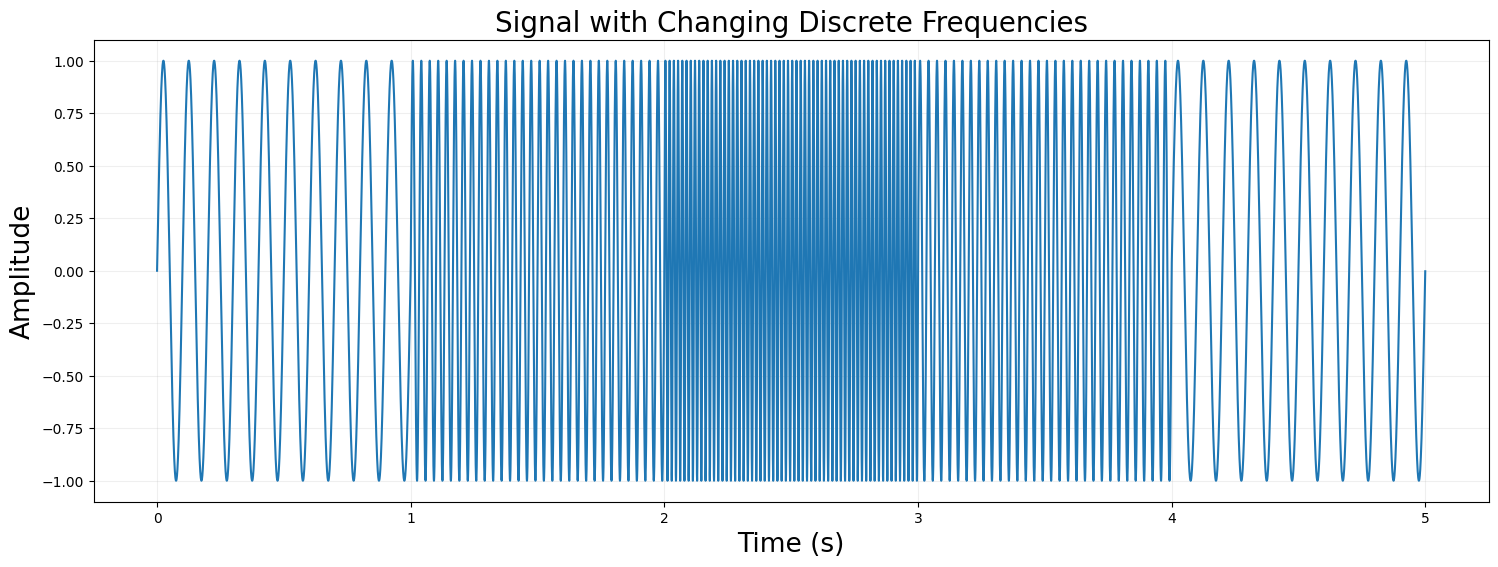

In [3]:
import matplotlib
import matplotlib.pyplot as plt

font_size = 20

plt.figure(figsize=(18, 6))

plt.plot(time, signal, linewidth=1.5)
plt.title('Signal with Changing Discrete Frequencies', fontsize=font_size)
plt.xlabel('Time (s)', fontsize=font_size-1)
plt.ylabel('Amplitude', fontsize=font_size-1)
plt.grid(alpha=0.2)

Now, you should compute the Discrete Fourier Transform of the signal. You can use any library from Python you prefer. You might need to cut the x-axis in the Fourier transform up to 100 Hz in the visualization. Please check https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html and https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

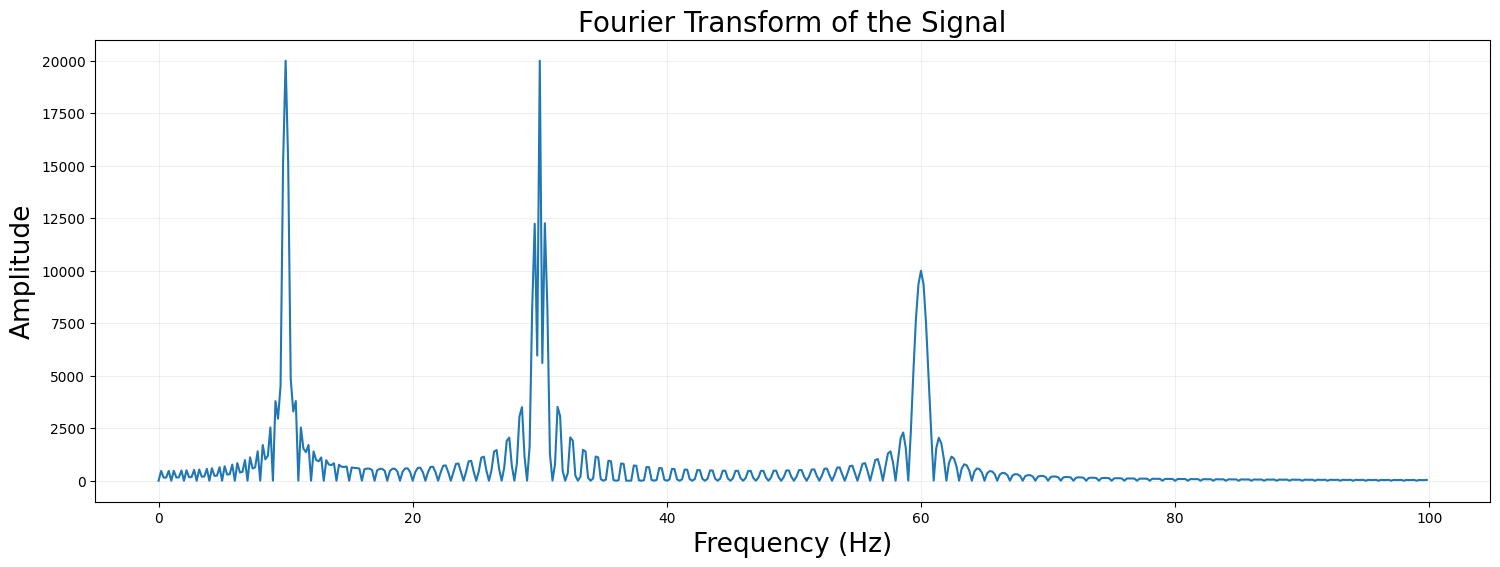

In [4]:
# Your code here
fourier_transform = np.fft.rfft(signal) #évite partie negative par symétrie
freq = np.fft.rfftfreq(len(signal), 1/f_e)
fourier_transform_c = fourier_transform[freq < 100]
freqs = freq[freq < 100]
plt.figure(figsize=(18, 6))
plt.plot(freqs, np.abs(fourier_transform_c), linewidth=1.5)
plt.title('Fourier Transform of the Signal', fontsize=font_size)
plt.xlabel('Frequency (Hz)', fontsize=font_size-1)
plt.ylabel('Amplitude', fontsize=font_size-1)
plt.grid(alpha=0.2)


**QUESTIONS**

1) Does the established sampling rate satisfy the Nyquist-Shannon sampling theorem to avoid aliasing? Please justify.

2) What can you say from the signal looking **only** at the Fourier transform?

3) Can you be certain about the location of some frequency component in the time domain? Why?

**YOUR ANSWERS HERE:**

1) la fréquence d'échantillonnage est de 20 kHz et le signal a pour fréquence maximale 60 HZ. 2*60 Hz < 20kHz = f_e donc le critère de Nyquist-Shannon est respecté.

2) On peut dire que le signal est composé des fréquences 10 Hz, 30 Hz etr 60 Hz et que les 2 premières citées sont plus importantes (amplitude 2x plus grande) que la fréquence 60 Hz.

3) On perd complètement l'information sur le temps, on ne sait pas quand ni combien de temps les fréquences de 10 et 30 Hz sont jouées, mais on sait qu'elles le sont plus que 60Hz.

# **Mother Wavelet**
As we saw in the course, a wavelet is not just a function but a whole family of functions that satisfy certain requirements. In this part of the TP we're gonna work with the Morlet wavelet defined as follows: $\Psi(t)=k e^{iw_0t}e^{-\frac{1}{2}(\frac{t}{\sigma})^2}$. Please generate a Morlet wavelet in Python **WITHOUT using PyWavelets** with the following parameters:

-Center frequency of the wavelet = 10 Hz

-Sampling rate $\eta$ = 20000 Hz

-$k=\frac{1}{\sqrt{\eta}}$

-$\sigma = 0.1$

You can generate the wavelet between -1 and 1 seconds, so the time duration of the wavelet is 2 seconds. For this part, you just need to generate the real part of the wavelet.

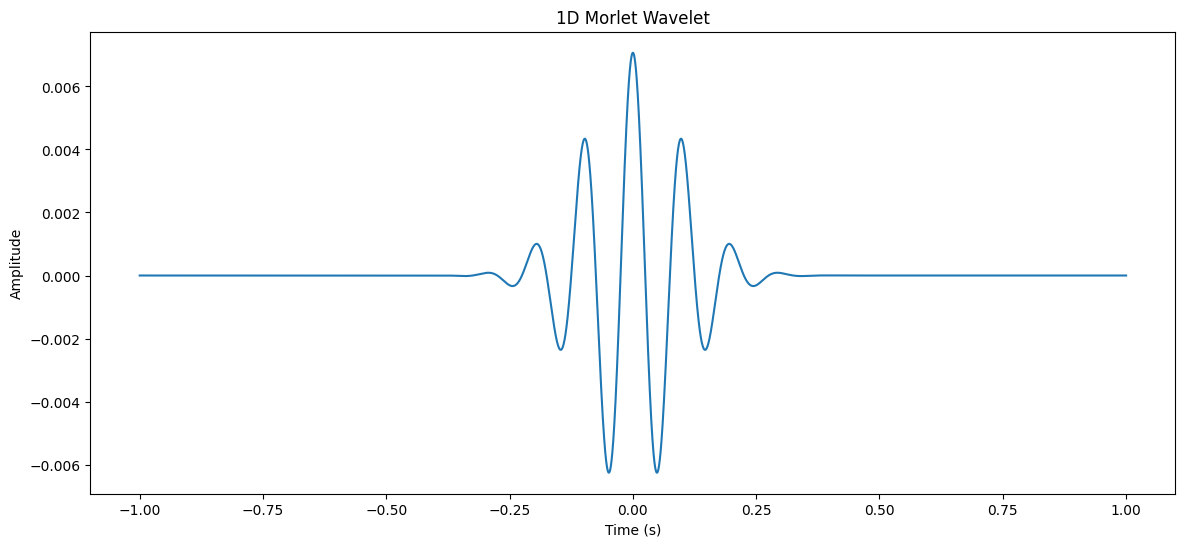

In [5]:
# Your code here
f_e = 20000 # 20 kHz
f_w = 10 # 10 Hz
k = 1/np.sqrt(f_e)
sig = 0.1
time = np.linspace(-1 , 1, f_e*2)
w0 = 2*np.pi*f_w
wavelet = k*np.exp(1j*w0*time)*np.exp(-(time/sig)**2 /2)
wavelet_r = np.real(wavelet)

# Plot the real part of the Morlet wavelet in 1D
plt.figure(figsize=(14, 6))

plt.plot(time, wavelet_r, linewidth=1.5)
plt.title('1D Morlet Wavelet')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Please show that the mother wavelet we just created satisfies the admissibility and the finite energy conditions:

In [6]:
# Your code here
mean = np.mean(wavelet_r)
print(mean)
energy = np.sum(np.abs(wavelet)**2)
print(energy)

2.370853053196455e-12
0.17724095395592432


**Note:** In real life, you have to deal with finite-precision related problems. Therefore, if for the admissibility condition you don't have exactly the value you were expecting for, don't worry.

**Commentaire:** on peut considérer que la moyenne est bien nulle (2.3 *10^-12 correspond à 0 avec l'approximation des flotants) et on a bien une énergie finie.

# **Convolution**

As we saw in the course, we need a measure of similarity to compute the wavelet transform. We also saw that we can easily compute the shift in time and similarity calculation with the 1-D convolutions.

* Generate a chirp sinusoidal signal from -5 to 5 seconds with an initial frequency of 5 Hz and final frequency of 15 Hz and sampling rate of 20kHz:

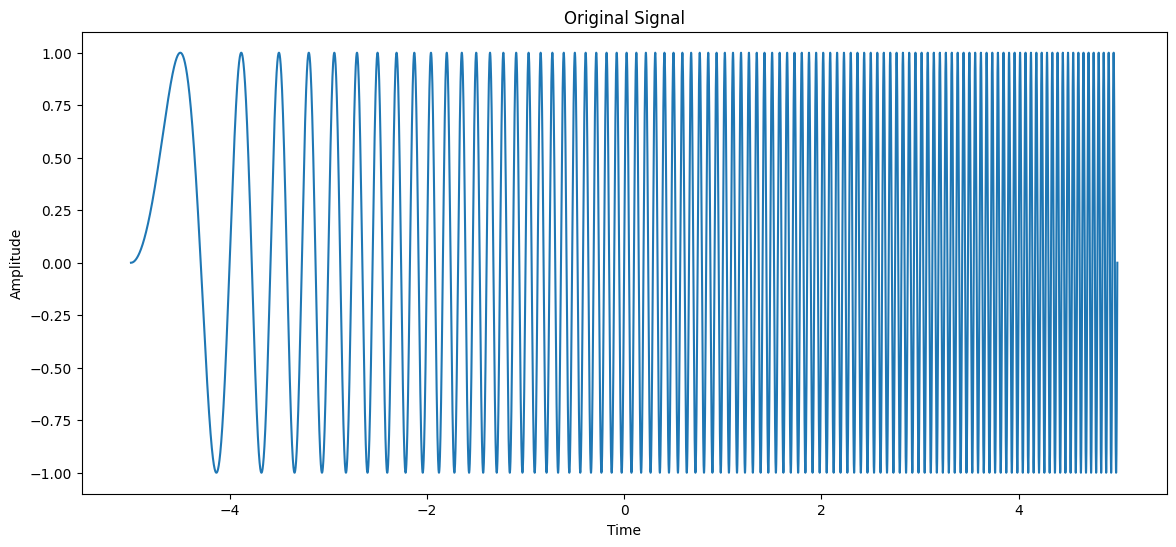

In [7]:
# Your code here
f_e = 20000 # 20 kHz
f_i = 5 # 5 Hz
f_f = 15 # 15 Hz

time_signal = np.linspace(-5, 5, f_e*10)
freq = np.linspace(f_i, f_f, f_e*10)
signal = np.sin(2*np.pi*freq*time_signal)

plt.figure(figsize=(14, 6))
plt.plot(time_signal, signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()

Now create a Morlet wavelet with the following parameters:

* Center frequency of the wavelet = 10 Hz

* Sampling rate $\eta$ = 20000 Hz

* $k=\frac{1}{\sqrt{\eta}}$
* $\sigma = 0.2$
* Duration = 2 seconds


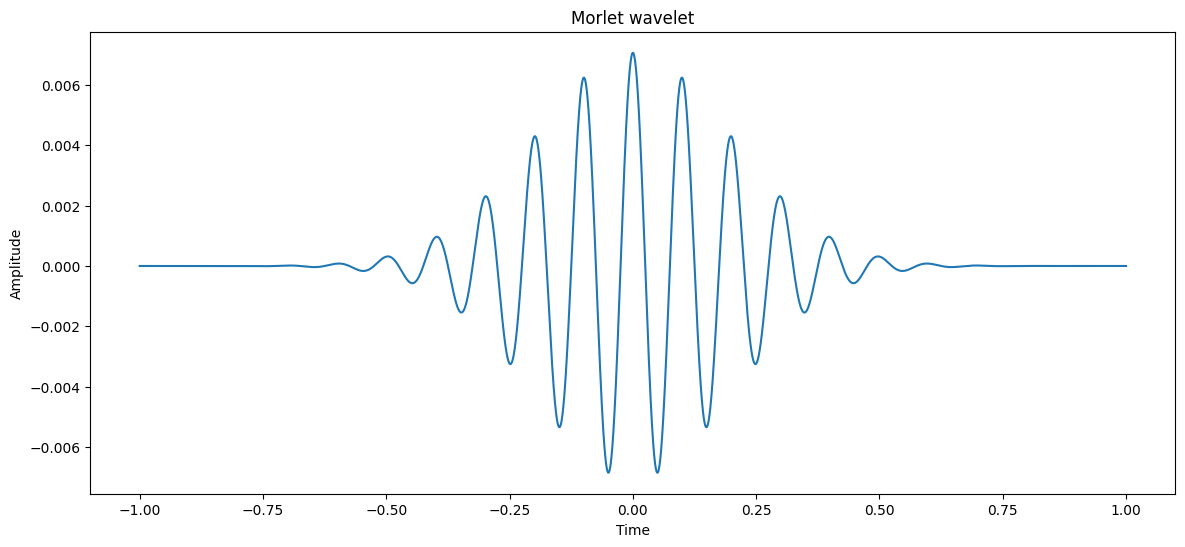

In [8]:
# Your code here
f_e = 20000 # 20 kHz
f_w = 10 # 10 Hz
k = 1/np.sqrt(f_e)
sig = 0.2
time = np.linspace(-1 , 1, f_e*2)
w0 = 2*np.pi*f_w
morlet_wavelet = k*np.exp(1j*w0*time)*np.exp(-(time/sig)**2 /2)


plt.figure(figsize=(14, 6))
plt.plot(time, np.real(morlet_wavelet))

plt.title('Morlet wavelet')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()

Compute the convolution between the signal and $Re(\Psi(t))$. For reference on how to perform convolution with scipy 'convolve' function, please check https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

C:\Users\maeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\maeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Amplitude')

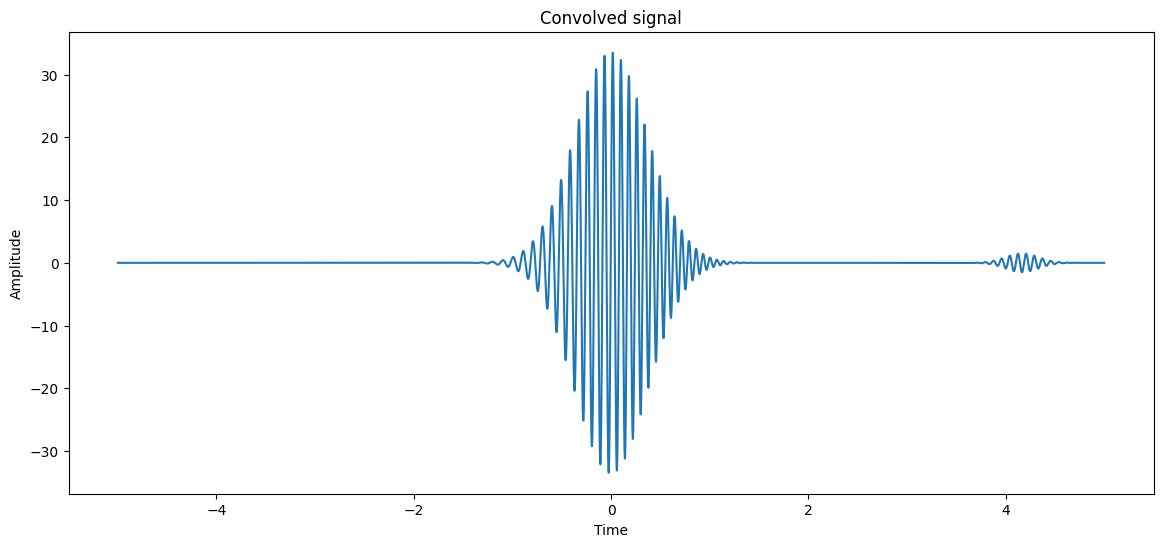

In [9]:
# Your code here
from scipy.signal import convolve
convolved_signal = convolve(signal, morlet_wavelet)
time_signal = np.linspace(-5, 5, len(convolved_signal))

plt.figure(figsize=(14, 6))
plt.plot(time_signal, convolved_signal)
plt.title('Convolved signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

There are some points where the convolution is zero, even in regions of high similarity between the wavelet and the signal. **Is this OK?** If it's not, propose a solution to that.

c'est parse qu'on utilise la partie réelle de la wavelet. il faudrait donc l'afficher en complexe pour ne pas avoir d'annulation.

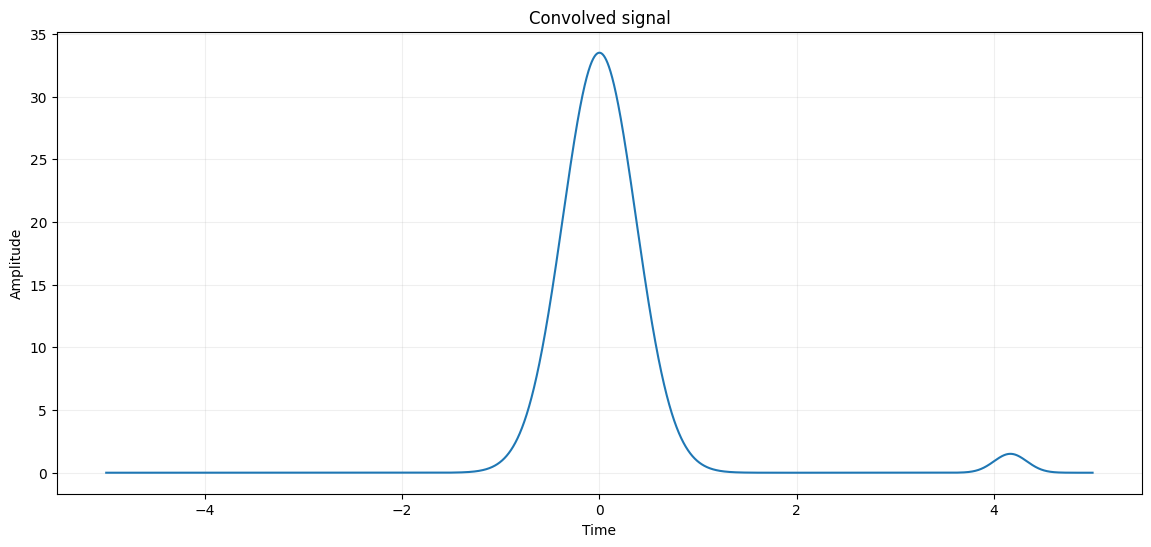

In [10]:
# Your code here
f_e = 20000 # 20 kHz
f_w = 10 # 10 Hz
k = 1/np.sqrt(f_e)
sig = 0.2
time = np.linspace(-1 , 1, f_e*2)
w0 = 2*np.pi*f_w
morlet_wavelet = k*np.exp(1j*w0*time)*np.exp(-(time/sig)**2 /2)

convolved_signal = convolve(signal, morlet_wavelet)
time_signal = np.linspace(-5, 5, len(convolved_signal))

plt.figure(figsize=(14, 6))
plt.plot(time_signal, np.abs(convolved_signal))
plt.title('Convolved signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(alpha=0.2)

# **Image Compression**
For this part, we'll use the Discrete Wavelet Transform (DWT) implemented as a filter bank to do image compression. The first step is to have an image to compress. For doing so you can use the following piece of code to download an image of Trudy.

In [42]:
!wget https://raw.githubusercontent.com/jhonygiraldo/jhonygiraldo.github.io/main/Trudy_for_compression.jpeg

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


**Visualize image:** With the following code you can visualize the image. If you're using Google Collab, most probably you already have the open cv library installed. If you're using Jupyter Notebook for example, you'll have to install open cv if it's not already installed.

In [11]:
# Let us define a function for visualizing images
def show_image(image, title='Input Image', font_size=12,fig_size = (10, 10)):
  #A function that uses matplotlib to show grayscale images
  plt.figure(figsize=fig_size)
  plt.imshow(image, cmap='gray')
  plt.title(title, fontsize=font_size)
  plt.axis('off')

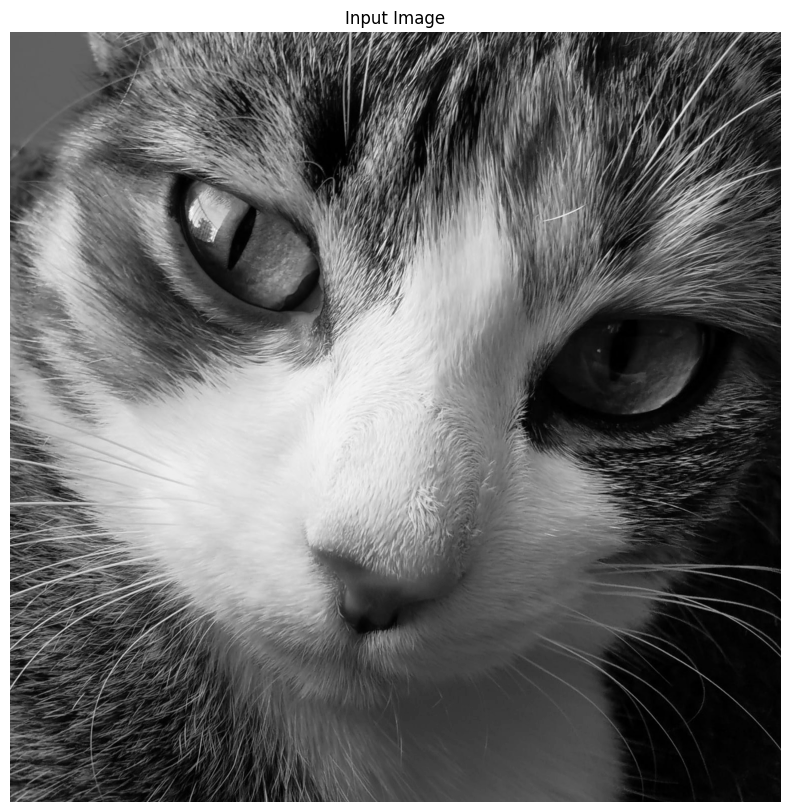

In [12]:
import cv2

# Load your image as a grayscale
input_image = cv2.imread('Trudy_for_compression.jpeg', cv2.IMREAD_GRAYSCALE)
# Display the original image
show_image(input_image, 'Input Image')

If you use some wavelet function (Biorthogonal 1.3 in this case), the 1-level 2D wavelet decomposition of our input image is given as follows:

In [13]:
# # You can see a list of wavelet families
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [14]:
# For each family, you can list the available wavelets
pywt.wavelist(family='bior', kind='all')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8']

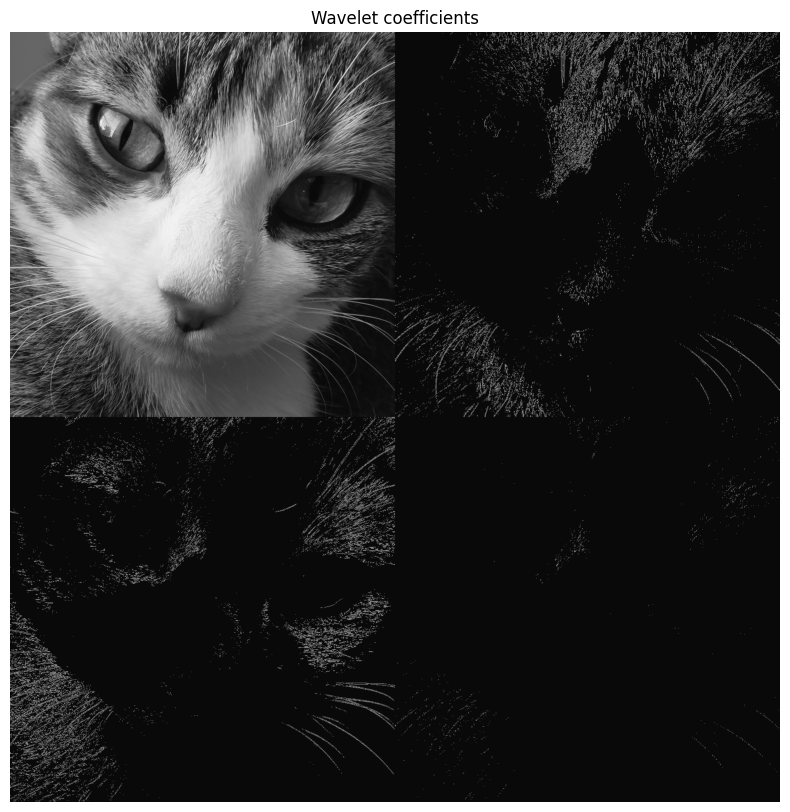

In the previous image we applied a threshold in the wavelet coefficients for visualization purposes. **Please explain the meaning of each of these 4 images**.

**réponse:** l'image en haut à gauche est l'image compressée (Low pass), en haut à droite les coefficients de détails (Haute Fréquence) dans la direction Verticale, en bas à gauche les coefficients de détails (Hautes fréquences) dans la direction Horizontale, et en bas à droite les coefficients de détails (HF) en diagonale.

**YOUR ANSWER HERE:**



Now, you should compute the six-levels 2D wavelet decomposition of the input image with a Daubechies wavelet with six vanishing moments using the PyWavelet library. Please check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2

In [15]:
import matplotlib.image as mpimg
import pywt
import numpy as np
import matplotlib.pyplot as plt
import cv2

"\n# Fonction pour visualiser les coefficients de décomposition\ndef plot_coeffs(coeffs):\n    fig, axes = plt.subplots(7, 1, figsize=(12, 24))\n    for i, ax in enumerate(axes):\n        if i == 0:\n            ax.imshow(coeffs[0], cmap='gray')\n            ax.set_title('Approximation coefficients (cA)')\n        else:\n            cH, cV, cD = coeffs[i]\n            ax.imshow(np.hstack((cH, cV, cD)), cmap='gray')\n            ax.set_title(f'Detail coefficients level {i} (cH, cV, cD)')\n    plt.tight_layout()\n    plt.show()\n\n# Afficher les coefficients de décomposition\nplot_coeffs(coeffs)\n\n# Afficher l'image d'origine et l'image reconstruite\nplt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1)\nplt.imshow(input_image, cmap='gray')\nplt.title('Image d'origine')\nplt.subplot(1, 2, 2)\nplt.imshow(reconstructed_image, cmap='gray')\nplt.title('Image reconstruite')\nplt.show()"

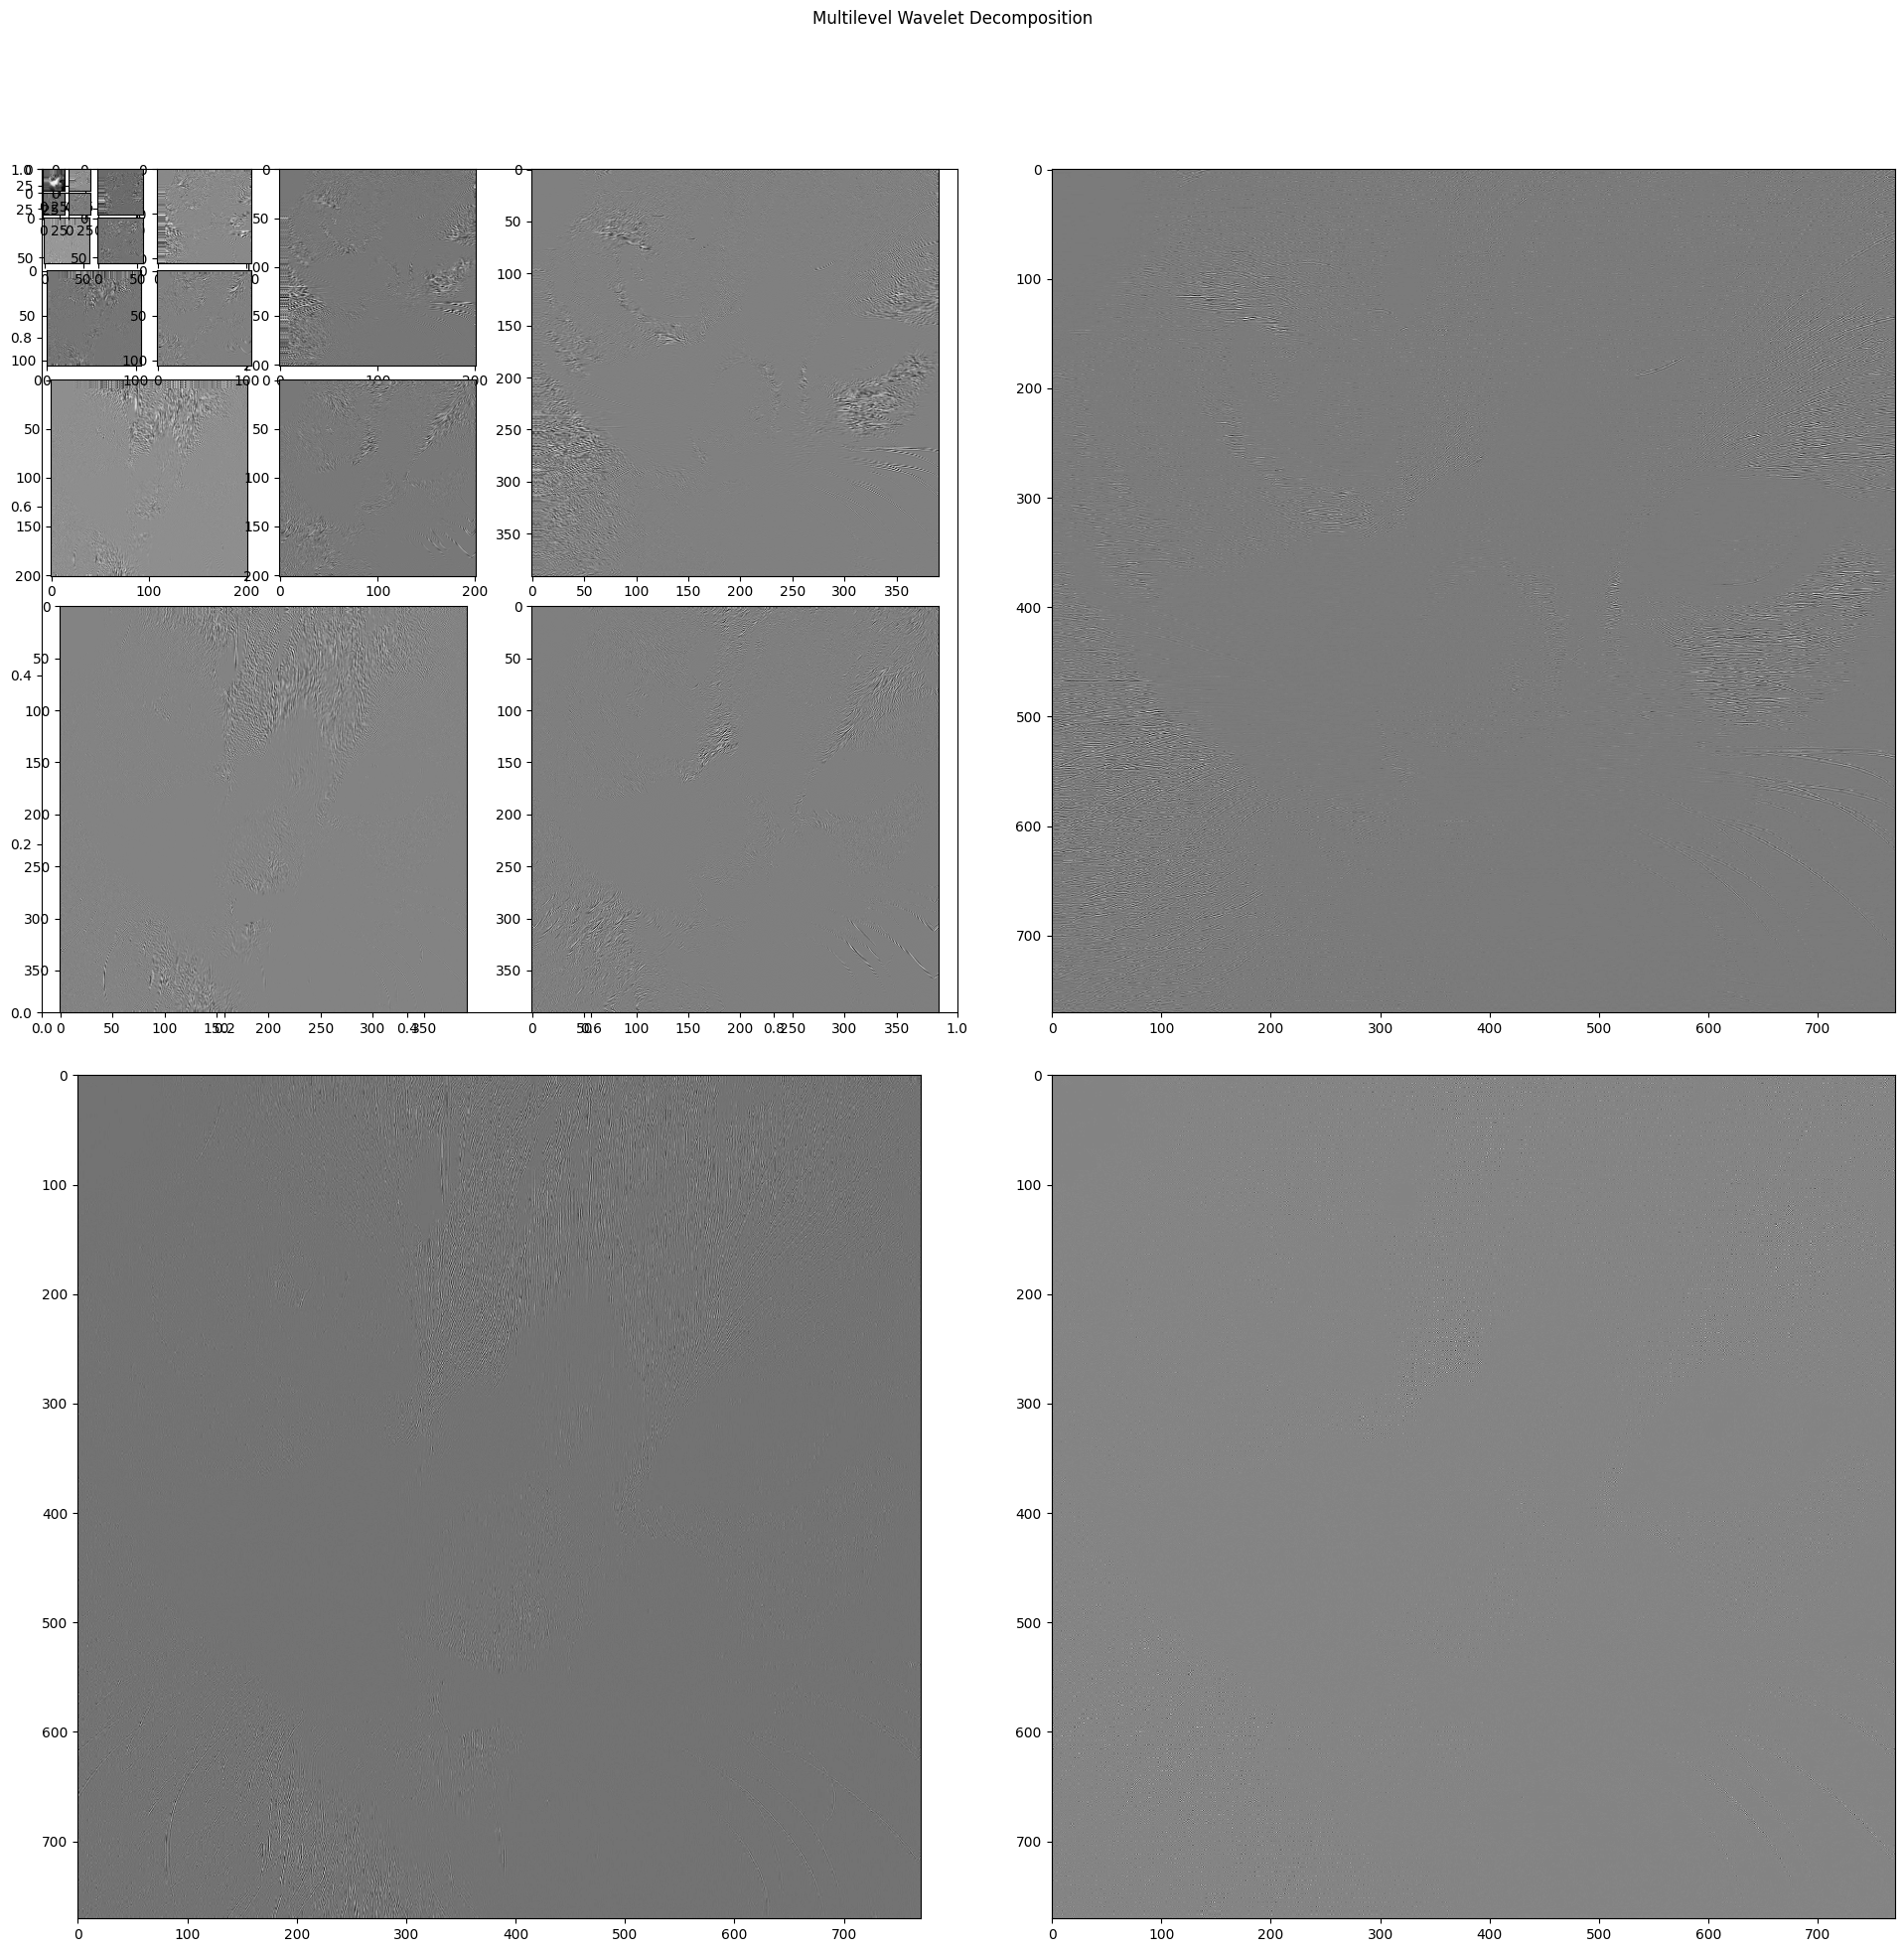

In [17]:
# Your code here
input_image = cv2.imread('Trudy_for_compression.jpeg', cv2.IMREAD_GRAYSCALE)

coeffs = pywt.wavedec2(input_image, 'db6', level=6) # Effectuer la décomposition en ondelettes 2D à six niveaux avec 'db6'

# ondelettes de décomposition
cA6,(cH6,cV6,cD6),(cH5,cV5,cD5),(cH4,cV4,cD4),(cH3,cV3,cD3),(cH2,cV2,cD2),(h, v, d) = coeffs

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Multilevel Wavelet Decomposition')
axes[0][1].imshow(h,cmap='gray')
axes[1][0].imshow(v,cmap='gray')
axes[1][1].imshow(d,cmap='gray')

#subdiviser la grille principale de 2x2 en 2x2
gs = fig.add_gridspec(2, 2)

grid_inte = gs[0, 0].subgridspec(2, 2) #sous grille dans la 1ere case de la grille principale
ax_h = fig.add_subplot(grid_inte[0, 1])
ax_h.imshow(cH2, cmap='gray')
ax_v = fig.add_subplot(grid_inte[1, 0])
ax_v.imshow(cV2, cmap='gray')
ax_d = fig.add_subplot(grid_inte[1, 1])
ax_d.imshow(cD2, cmap='gray')

grid_inte = grid_inte[0, 0].subgridspec(2, 2)
ax_h = fig.add_subplot(grid_inte[0, 1])
ax_h.imshow(cH3, cmap='gray')
ax_v = fig.add_subplot(grid_inte[1, 0])
ax_v.imshow(cV3, cmap='gray')
ax_d = fig.add_subplot(grid_inte[1, 1])
ax_d.imshow(cD3, cmap='gray')

grid_inte = grid_inte[0, 0].subgridspec(2, 2)
ax_h = fig.add_subplot(grid_inte[0, 1])
ax_h.imshow(cH4, cmap='gray')
ax_v = fig.add_subplot(grid_inte[1, 0])
ax_v.imshow(cV4, cmap='gray')
ax_d = fig.add_subplot(grid_inte[1, 1])
ax_d.imshow(cD4, cmap='gray')

grid_inte = grid_inte[0, 0].subgridspec(2, 2)
ax_h = fig.add_subplot(grid_inte[0, 1])
ax_h.imshow(cH5, cmap='gray')
ax_v = fig.add_subplot(grid_inte[1, 0])
ax_v.imshow(cV5, cmap='gray')
ax_d = fig.add_subplot(grid_inte[1, 1])
ax_d.imshow(cD5, cmap='gray')

grid_inte = grid_inte[0, 0].subgridspec(2, 2)
ax_h = fig.add_subplot(grid_inte[0, 1])
ax_h.imshow(cH6, cmap='gray')
ax_v = fig.add_subplot(grid_inte[1, 0])
ax_v.imshow(cV6, cmap='gray')
ax_d = fig.add_subplot(grid_inte[1, 1])
ax_d.imshow(cD6, cmap='gray')
ax_im = fig.add_subplot(grid_inte[0,0])
ax_im.imshow(cA6, cmap='gray')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

"""
# Fonction pour visualiser les coefficients de décomposition
def plot_coeffs(coeffs):
    fig, axes = plt.subplots(7, 1, figsize=(12, 24))
    for i, ax in enumerate(axes):
        if i == 0:
            ax.imshow(coeffs[0], cmap='gray')
            ax.set_title('Approximation coefficients (cA)')
        else:
            cH, cV, cD = coeffs[i]
            ax.imshow(np.hstack((cH, cV, cD)), cmap='gray')
            ax.set_title(f'Detail coefficients level {i} (cH, cV, cD)')
    plt.tight_layout()
    plt.show()

# Afficher les coefficients de décomposition
plot_coeffs(coeffs)

# Afficher l'image d'origine et l'image reconstruite
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Image d\'origine')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Image reconstruite')
plt.show()"""

* Set a threshold of value of 100 and take to zero the values less than that in the 2D wavelet decomposition. **Note:** You should only threshold the outputs of the high-pass filters.



In [18]:
t = 100

cH6 = np.where(np.abs(cH6) < t, 0, cH6)
cV6 = np.where(np.abs(cV6) < t, 0, cV6)
cD6 = np.where(np.abs(cD6) < t, 0, cD6)
cH5 = np.where(np.abs(cH5) < t, 0, cH5)
cV5 = np.where(np.abs(cV5) < t, 0, cV5)
cD5 = np.where(np.abs(cD5) < t, 0, cD5)
cH4 = np.where(np.abs(cH4) < t, 0, cH4)
cV4 = np.where(np.abs(cV4) < t, 0, cV4)
cD4 = np.where(np.abs(cD4) < t, 0, cD4)
cH3 = np.where(np.abs(cH3) < t, 0, cH3)
cV3 = np.where(np.abs(cV3) < t, 0, cV3)
cD3 = np.where(np.abs(cD3) < t, 0, cD3)
cH2 = np.where(np.abs(cH2) < t, 0, cH2)
cV2 = np.where(np.abs(cV2) < t, 0, cV2)
cD2 = np.where(np.abs(cD2) < t, 0, cD2)
h = np.where(np.abs(h) < t, 0, h)
v = np.where(np.abs(v) < t, 0, v)
d = np.where(np.abs(d) < t, 0, d)

coeffs_t = [cA6, (cH6, cV6, cD6), (cH5, cV5, cD5), (cH4, cV4, cD4), (cH3, cV3, cD3), (cH2, cV2, cD2), (h, v, d)]



* Compute the IDWT to reconstruct the image after the "compression". Check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-reconstruction-using-waverec2 as a reference.

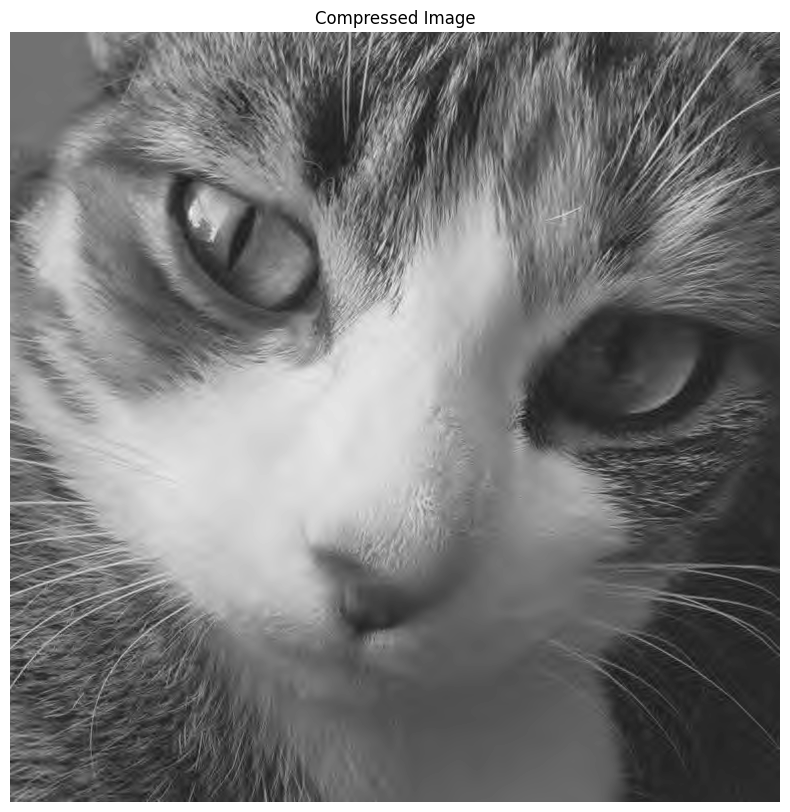

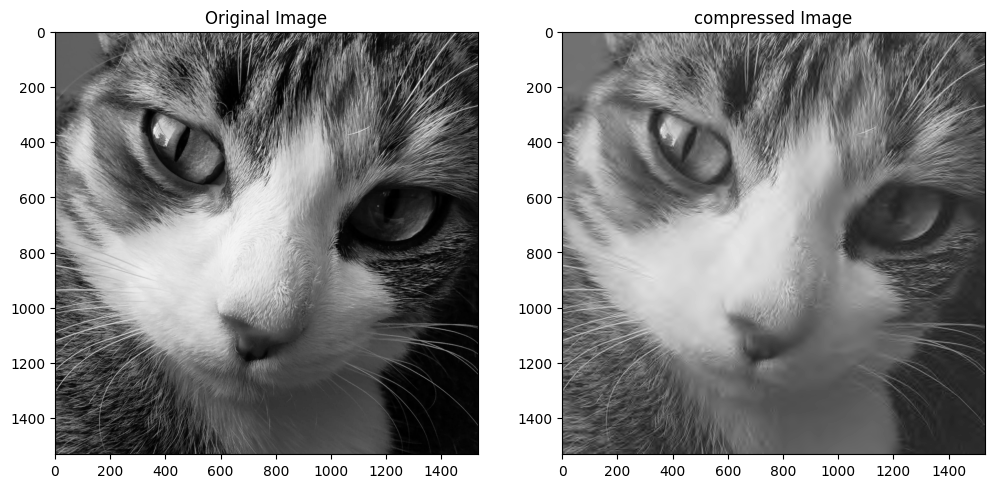

In [19]:
img_reco = pywt.waverec2(coeffs_t, 'db6')
show_image(img_reco, 'Compressed Image')

#comparaison avec l'image originale
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(input_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_reco, cmap='gray')
ax[1].set_title('compressed Image')

plt.show()


What's the compression ratio?

In [ ]:
# Calculer la taille de l'image originale (nombre total de coefficients)
coA6,(coH6,coV6,coD6),(coH5,coV5,coD5),(coH4,coV4,coD4),(coH3,coV3,coD3),(coH2,coV2,coD2),(oh, ov, od) = coeffs

#on récupère les coeffs de coeffs_t pour calculer la taille de l'image compressée
#taille originale = somme des tailles de chaque coefficient
#taille compressée = somme des coefficients non nuls (car ne coutent rien en mémoire)
original_size = sum(co.size for co in [coA6, coH6, coV6, coD6, coH5, coH4, coH3, coH2, coV5, coV4, coV3, coV2, coD5, coD4, coD3, coD2, oh, ov, od])
compressed_size = sum(np.count_nonzero(co) for co in [cA6, cH6, cV6, cD6, cH5, cH4, cH3, cH2, cV5, cV4, cV3, cV2, cD5, cD4, cD3, cD2, h, v, d])

compression_ratio = 1- compressed_size / original_size

print("Taille de l'image originale:", original_size)
print("Taille de l'image compressée:", compressed_size)
print("Ratio de compression:", compression_ratio)

Taille de l'image originale: 2411593
Taille de l'image compressée: 29327
Ratio de compression: 0.9878391585976573


# **Putting everything together**

In this exercise we'll analyze the Peak Signal to Noise Ration (PSNR) of the compressed images for different thresholds. For doing so, we'll give you the function to compute the PSNR between the original and compressed image.

In [21]:
def psnr(original_image, compressed_image):
    h,w = original_image.shape
    mse = np.sum(np.abs(original_image-compressed_image)**2)/(h*w)
    return 20* np.log10(255**2/mse)

Now, you have to create a function codec that receives the input image, the wavelet to be used, the number of levels, and the threshold value. This function returns the compressed image and the compression ratio. **Note:** You already did that previously.

In [ ]:
def codec(input_image,wavelet='db4',num_levels=6,threshold=100):
  coeffs = pywt.wavedec2(input_image, wavelet, level=num_levels)
  img_c = coeffs[0]
  details_t = []
  
  for i in range(1,len(coeffs)):
    details_t.append(tuple(np.where(np.abs(c) < threshold, 0, c)for c in coeffs[i]))
  
  coeffs_t = [img_c] + details_t

  img_reco = pywt.waverec2(coeffs_t, wavelet)
  original_size = sum(co.size if isinstance(co, np.ndarray) else sum(c.size for c in co) for co in coeffs)
  compressed_size = sum(np.count_nonzero(co) if isinstance(co, np.ndarray) else sum(np.count_nonzero(c) for c in co) for co in coeffs_t)

  compression_ratio = 1- compressed_size / original_size
  plt.figure(figsize=(6, 3))
  plt.imshow(img_reco, cmap='gray')
  plt.title('compressed image with wavelet: '+wavelet)
  return(compression_ratio)



"\n#ancien code\ndef codec(input_image,wavelet='db4',num_levels=6,threshold=100):\n  coeffs = pywt.wavedec2(input_image, wavelet, level=num_levels)\n  img_c = coeffs[0]\n  details_t = []\n  for i in range(1,len(coeffs)):\n    details_t.append(np.where(np.abs(coeffs[i]) < threshold, 0, coeffs[i]))\n  coeffs_t = [img_c] \n  for i in range(len(details_t)//3):\n    coeffs_t.append([details_t[3*i], details_t[3*i+1], details_t[3*i+2]])\n  img_reco = pywt.waverec2(coeffs_t, wavelet)\n\n  original_size = sum(co.size for co in coeffs)\n  compressed_size = sum(np.count_nonzero(co) for co in coeffs_t)\n  compression_ratio = compressed_size / original_size\n  return(img_reco,compression_ratio)"

Now, we compare the performance of the 'db4' and the 'bior1.3' wavelets in terms of compression ratio and PSNR for different thresholds.

0.7357872022574488 db4
0.6432439223993089 bior1.3
0.8388088705127463 db4
0.7713315256918529 bior1.3
0.9148850107850854 db4
0.8736128052186899 bior1.3
0.9610663863298937 db4
0.9441487690905955 bior1.3
0.9840244087484522 db4
0.9796393683570546 bior1.3
0.9886800614661848 db4
0.9856049225413961 bior1.3


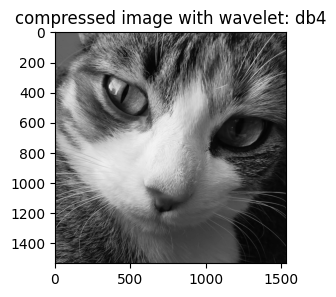

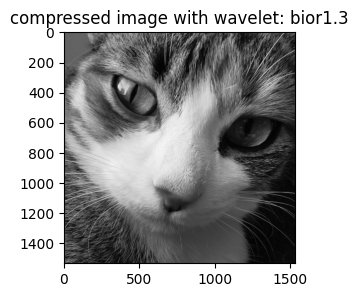

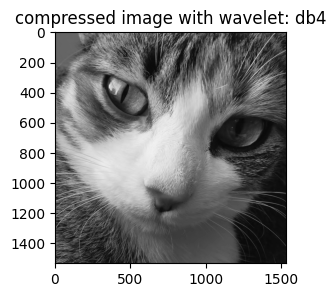

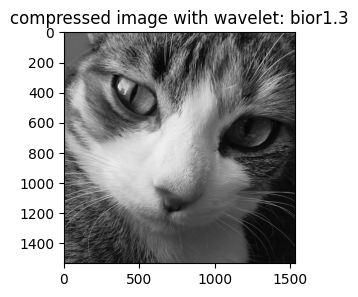

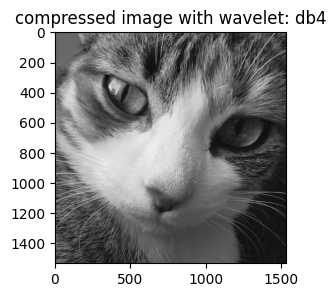

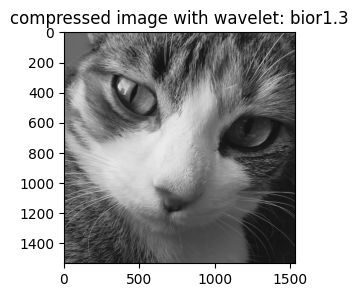

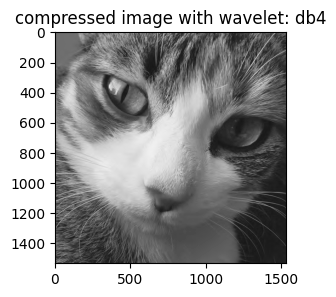

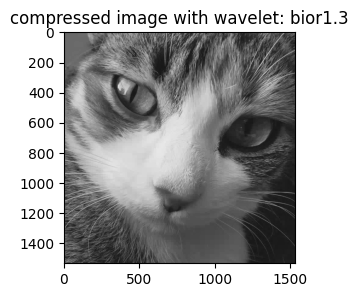

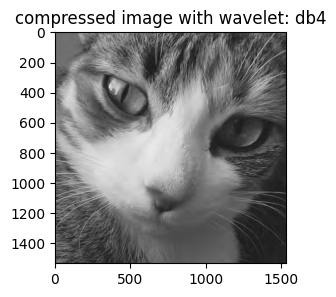

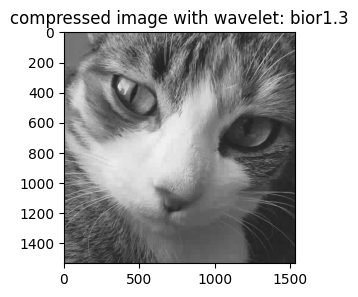

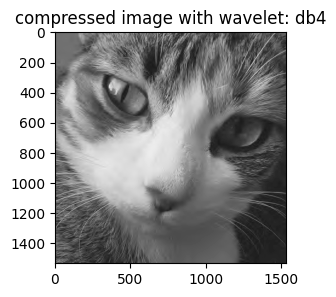

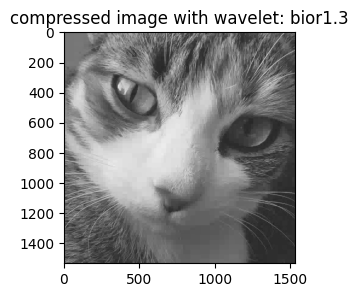

In [23]:
wavelet_1 = 'db4'
wavelet_2 = 'bior1.3'
thresholds = [5,10,20,40,80,100]
num_levels=6

#wavelet_1 db4
com_ratio_db4 = {}
for i in range(len(thresholds)):
    print(codec(input_image, wavelet_1, num_levels, thresholds[i]), wavelet_1)
    print(codec(input_image, wavelet_2, num_levels, thresholds[i]), wavelet_2)

**QUESTIONS**

1) Which wavelet is better for the Trudy_for_compression.jpeg image and why?

*reponse :* la meilleure wavelet entre la db4 et bior1.3 pour l'image Trudy_for_compression.jpeg, est la db4 car elle a systématiquement un meilleur ratio de compression pour un même seuil (et visuellement on ne voit pas la différence).

# Supplementary Exercises (Optional)
1. Designing and using custom filters with the pyWavelets library
Reference (https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-families)
2. Propose and explore custom wavelets that achieve equivalent or higher compression ratio on the Trudy image explored previously. **P.S** You are free to explore any approach here.